In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## importamos dataset

In [12]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:,1:2].values
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stocl_price = dataset_test.iloc[:,1:2].values

In [13]:
dataset_train.head(10) , dataset_train.tail(10)

(        Date    Open    High     Low   Close      Volume
 0   1/3/2012  325.25  332.83  324.97  663.59   7,380,500
 1   1/4/2012  331.27  333.87  329.08  666.45   5,749,400
 2   1/5/2012  329.83  330.75  326.89  657.21   6,590,300
 3   1/6/2012  328.34  328.77  323.68  648.24   5,405,900
 4   1/9/2012  322.04  322.29  309.46  620.76  11,688,800
 5  1/10/2012  313.70  315.72  307.30  621.43   8,824,000
 6  1/11/2012  310.59  313.52  309.40  624.25   4,817,800
 7  1/12/2012  314.43  315.26  312.08  627.92   3,764,400
 8  1/13/2012  311.96  312.30  309.37  623.28   4,631,800
 9  1/17/2012  314.81  314.81  311.67  626.86   3,832,800,
             Date    Open    High     Low   Close     Volume
 1248  12/16/2016  800.40  800.86  790.29   790.8  2,443,800
 1249  12/19/2016  790.22  797.66  786.27   794.2  1,232,100
 1250  12/20/2016  796.76  798.65  793.27  796.42    951,000
 1251  12/21/2016  795.84  796.68  787.10  794.56  1,211,300
 1252  12/22/2016  792.36  793.32  788.58  791.26    972

In [14]:
dataset_test.head(10) 

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"
5,1/10/2017,807.86,809.13,803.51,804.79,"1,176,800"
6,1/11/2017,805.00,808.15,801.37,807.91,"1,065,900"
7,1/12/2017,807.14,807.39,799.17,806.36,"1,353,100"
8,1/13/2017,807.48,811.22,806.69,807.88,"1,099,200"
9,1/17/2017,807.08,807.14,800.37,804.61,"1,362,100"


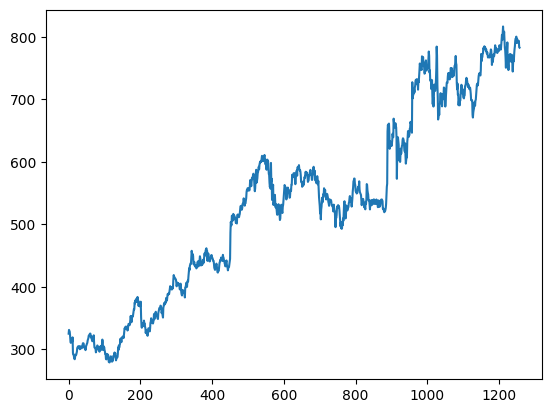

In [5]:
plt.plot(dataset_train['Open'])

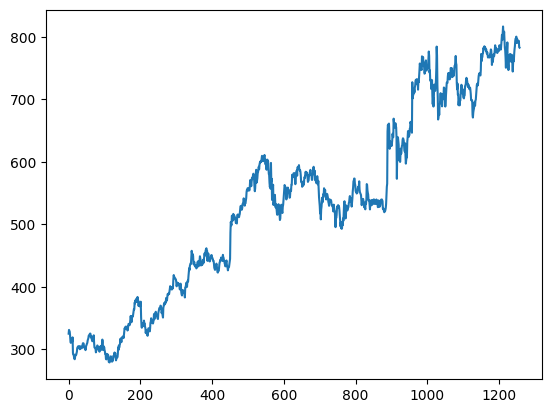

In [ ]:
plt.plot(training_set)dataset_test

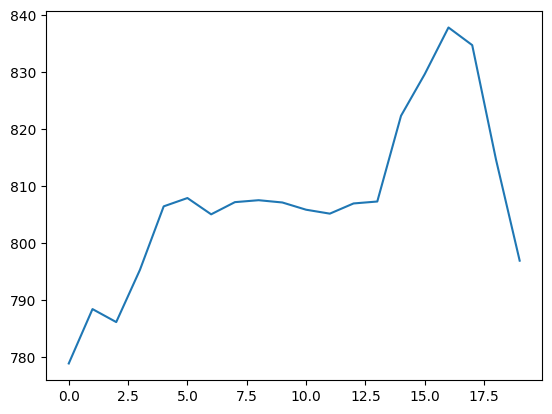

In [15]:
plt.plot(dataset_test['Open'])

## Escalamos los datos 
LSTM funciona mejor con datos entre 0 y 1

In [8]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [17]:
X_train = []
y_train = []

for i in range(60,1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

In [20]:
X_train, X_train.shape

(array([[0.08581368, 0.09701243, 0.09433366, ..., 0.07846566, 0.08034452,
         0.08497656],
        [0.09701243, 0.09433366, 0.09156187, ..., 0.08034452, 0.08497656,
         0.08627874],
        [0.09433366, 0.09156187, 0.07984225, ..., 0.08497656, 0.08627874,
         0.08471612],
        ...,
        [0.92106928, 0.92438053, 0.93048218, ..., 0.95475854, 0.95204256,
         0.95163331],
        [0.92438053, 0.93048218, 0.9299055 , ..., 0.95204256, 0.95163331,
         0.95725128],
        [0.93048218, 0.9299055 , 0.93113327, ..., 0.95163331, 0.95725128,
         0.93796041]], shape=(1198, 60)),
 (1198, 60))

In [21]:
y_train, y_train.shape

(array([0.08627874, 0.08471612, 0.07454052, ..., 0.95725128, 0.93796041,
        0.93688146], shape=(1198,)),
 (1198,))

In [22]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [23]:
X_train.shape

(1198, 60, 1)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

In [25]:
regressor = Sequential()

In [26]:
regressor.add(LSTM(units=50, return_sequences=True, input_shape={X_train.shape[1], 1}))
regressor.add(Dropout(0.2))

I0000 00:00:1742233980.763004   18112 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5558 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3070 Ti, pci bus id: 0000:01:00.0, compute capability: 8.6
/home/pablost/Bootcamp_DataScience_IA/.env/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [27]:
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

In [28]:
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

In [29]:
regressor.add(Dense(units=1))


In [30]:
regressor.compile(optimizer='adam', loss='mean_squared_error', metrics=['r2_score'])

In [ ]:
regressor.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100


I0000 00:00:1742234185.579873   22091 cuda_dnn.cc:529] Loaded cuDNN version 90800


38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0944 - r2_score: -0.2905
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0065 - r2_score: 0.9096
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0042 - r2_score: 0.9443
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0040 - r2_score: 0.9456
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0042 - r2_score: 0.9451
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0042 - r2_score: 0.9432
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0045 - r2_score: 0.9388
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0043 - r2_score: 0.9424
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0039 - r2_score: 0.9484
Epoch 10/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0040 - r2_score: 0.9449
Epoch 11/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0038 - r2_score: 0.9491
Epoch 12/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.

In [35]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis=0)
inputs = dataset_total[len(dataset_total)- len(dataset_test) - 60:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)


In [ ]:
x_test = []
for i in range(60,80):
    
    

---

# Time-based LSTM

In [63]:
X_train.shape

(1198, 60, 1)

In [66]:
X_train_2 = X_train[:-200]
# X_train_2 = np.reshape(X_train_2, (X_train_2.shape[0], X_train_2.shape[1], 1))
X_train_2.shape

(998, 60, 1)

In [67]:
y_train_2 = y_train[:-200]
# y_train_2 = np.reshape(y_train_2, (y_train_2.shape[0], 1))
y_train_2.shape

(998,)

In [ ]:
X_val = X_train[-200:]
X_val = np.reshape(X_val, (X_val.shape[0], X_val.shape[1], 1))
y_val = y_train[-200:]

In [69]:
regressor = Sequential()

regressor.add(LSTM(units=50, return_sequences=True, input_shape={X_train.shape[1], 1}))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units=1))

regressor.compile(optimizer='adam', loss='mean_squared_error', metrics=['r2_score'])

/home/pablost/Bootcamp_DataScience_IA/.env/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [70]:
regressor.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1047 - r2_score: -0.4231 - val_loss: 0.0150 - val_r2_score: -2.9622
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0063 - r2_score: 0.9107 - val_loss: 0.0016 - val_r2_score: 0.5787
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0052 - r2_score: 0.9302 - val_loss: 0.0015 - val_r2_score: 0.6134
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0051 - r2_score: 0.9296 - val_loss: 0.0014 - val_r2_score: 0.6269
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0049 - r2_score: 0.9369 - val_loss: 0.0018 - val_r2_score: 0.5351
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0041 - r2_score: 0.9442 - val_loss: 0.0045 - val_r2_score: -0.1970
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0046 - r2_score: 0.9362 - val_loss: 0.0031 - val_r2_score: 0.1789
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0043 - r2_score: 0.9428 - val_loss: 0.0

---

In [ ]:
from sktime.model_selection import ExpandingWindowSplitter

expanding_window = ExpandingWindowSplitter(window_width=12, step_length=12)

r2_scores = []
historys = []

for train_index, val_index in expanding_window.split(X_train):
    X_train_2, X_val = X_train[train_index], X_train[val_index]
    y_train_2, y_val = y_train[train_index], y_train[val_index]
    
    regressor = Sequential()
    regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train_2.shape[1], 1)))
    regressor
